In [ ]:
import kagglehub

path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")

print("Path to dataset files:", path)

100%|██████████| 15.1M/15.1M [00:00<00:00, 107MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1


Dataset downloaded at: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1
Dataset root path: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4954 - loss: 0.7521 - val_accuracy: 0.7619 - val_loss: 0.5846
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 956ms/step - accuracy: 0.7391 - loss: 0.5957 - val_accuracy: 0.7619 - val_loss: 0.4250
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 909ms/step - accuracy: 0.7444 - loss: 0.5628 - val_accuracy: 0.7619 - val_loss: 0.4268
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 919ms/step - accuracy: 0.7777 - loss: 0.4702 - val_accuracy: 0.7619 - val_loss: 0.4178
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 886ms/step - accuracy: 0.8436 - loss: 0.4166 - val_accuracy: 0.7619 - val_loss: 0.4180
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 884ms/step - accuracy: 0.8672 - loss: 0.3408 - val_accuracy: 0.6667 - val_loss: 0.4404
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 965ms/step - accuracy: 0.8320 - loss: 0.4313 - val_accuracy: 0.8095 - val_loss: 0.4452
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8843 - loss: 0.2981 - val_accuracy: 0.7143 - val_loss

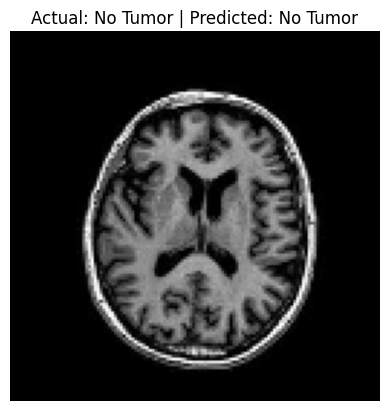

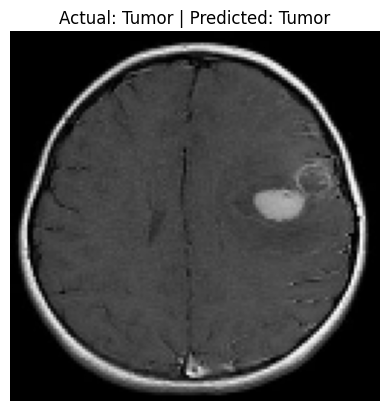

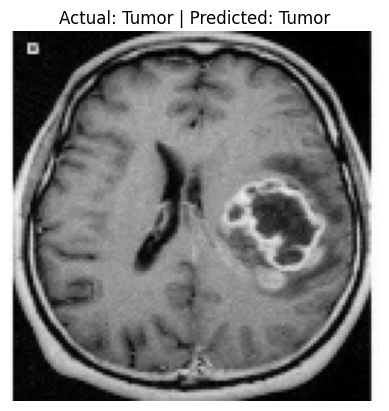

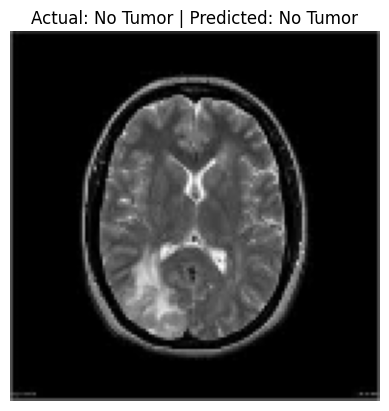

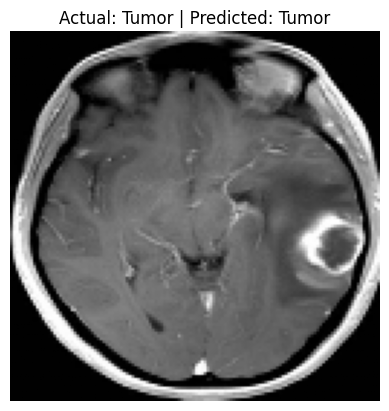

In [ ]:
!pip install -q kagglehub

import kagglehub
import os
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Download dataset
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")
print("Dataset downloaded at:", path)

# Step 2: Unzip dataset if needed
dataset_zip_path = os.path.join(path, "brain-mri-images-for-brain-tumor-detection.zip")
if os.path.exists(dataset_zip_path):
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(path)

# Step 3: Preprocess the data
IMG_SIZE = 128
data = []#stores image array
labels = []#stores yes or nos
categories = ["yes", "no"]

# improved logic to find the dataset root
dataset_path = path
for root, dirs, files in os.walk(path):
    if "yes" in dirs and "no" in dirs:
        dataset_path = root
        break

print("Dataset root path:", dataset_path)

#here we are turing the image to gray scale for better computation and less complexity and faster training
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(1 if category == "yes" else 0)
        except Exception as e:
            pass


# Normalize and reshape
X = np.array(data) / 255.0
#here we are reshaping the image to (batch,height,width,chnannel )which here is grayscale
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#labels are converted to array for usability in training
y = np.array(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the model
model = models.Sequential([
    #relu helps enhance the learning capacity of the model as well
    #Without non-linearity, the CNN would behave like a linear
model, limiting its capability to capture intricate relationships
in the data.
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Step 6: Test the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

# Step 7: Classification Report
#helps give y probability output
#we have a threshold of 0.5 exceeding that will lead to yes or 1
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))

for i in range(5):
    show_result(i)

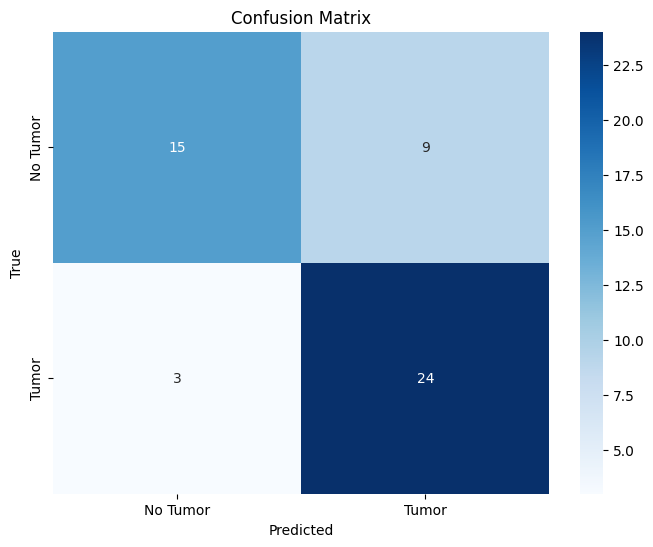

In [ ]:
# prompt: make confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Tumor", "Tumor"],
            yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


100%|██████████| 15.1M/15.1M [00:00<00:00, 132MB/s]

Extracting files...


Dataset downloaded at: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1
Dataset root path: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,583,681 (17.49 MB)

 Trainable params: 4,583,169 (17.48 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6718 - loss: 0.9782 - val_accuracy: 0.7000 - val_loss: 0.6737
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7546 - loss: 0.5319 - val_accuracy: 0.7000 - val_loss: 0.6781
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7187 - loss: 0.5462 - val_accuracy: 0.7000 - val_loss: 0.6576
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7861 - loss: 0.4873 - val_accuracy: 0.4500 - val_loss: 0.6855
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8074 - loss: 0.4271 - val_accuracy: 0.4500 - val_loss: 0.6876
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8702 - loss: 0.3943 - val_accuracy: 0.4500 - val_loss: 0.6818
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8334 - loss: 0.4168 - val_accuracy: 0.4500 - val_loss: 0.6762
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7859 - loss: 0.4423 - val_accuracy: 0.4500 - val_loss: 0.7141
2/2 ━━━━━━━━━━━━━━━━━━━━ 

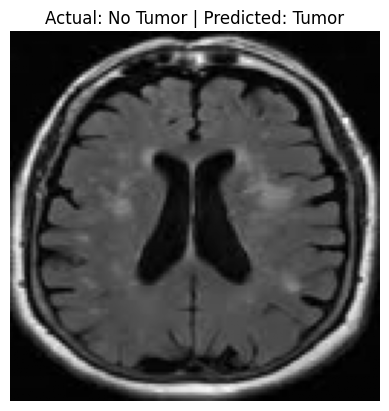

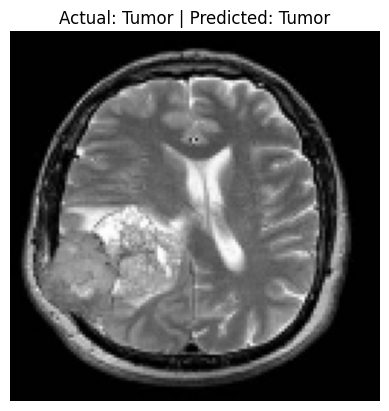

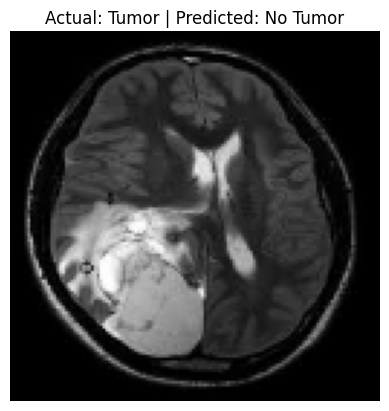

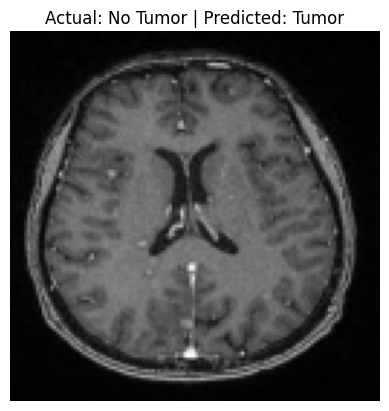

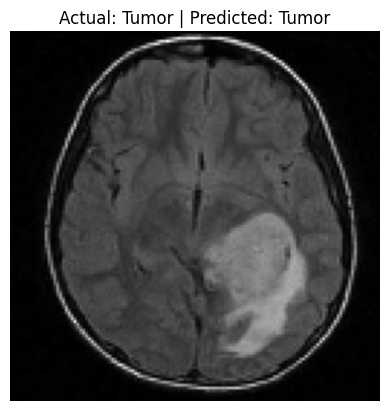

In [ ]:
!pip install -q kagglehub

import kagglehub
import os
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Download dataset
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")
print("Dataset downloaded at:", path)

# Step 2: Unzip dataset if needed
dataset_zip_path = os.path.join(path, "brain-mri-images-for-brain-tumor-detection.zip")
if os.path.exists(dataset_zip_path):
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(path)

# Step 3: Preprocess the data
IMG_SIZE = 128
data = []
labels = []
categories = ["yes", "no"]

# Find dataset root containing 'yes' and 'no'
dataset_path = path
for root, dirs, files in os.walk(path):
    if "yes" in dirs and "no" in dirs:
        dataset_path = root
        break

print("Dataset root path:", dataset_path)

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(1 if category == "yes" else 0)
        except:
            pass

# Normalize and reshape
X = np.array(data) / 255.0
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Step 5: Improved model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128, 128, 1)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 6: Train with early stopping
early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Calculate validation data size based on split
validation_size = int(0.1 * len(X_train))

# Split training data into training and validation sets
X_train_subset, X_val, y_train_subset, y_val = train_test_split(
    X_train, y_train, test_size=validation_size, random_state=42
)

history = model.fit(
    datagen.flow(X_train_subset, y_train_subset, batch_size=32),  # Use training subset
    validation_data=(X_val, y_val),  # Pass validation data separately
    epochs=30,
    callbacks=[early_stop]
)

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

# Step 8: Classification Report
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))

# Show 5 predictions
def show_result(index):
    plt.imshow(X_test[index].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Actual: {'Tumor' if y_test[index]==1 else 'No Tumor'} | Predicted: {'Tumor' if y_pred_labels[index]==1 else 'No Tumor'}")
    plt.axis('off')
    plt.show()

for i in range(5):
    show_result(i)

Dataset downloaded at: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1
Dataset root path: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4735 - loss: 0.7210 - val_accuracy: 0.8095 - val_loss: 0.5478
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 819ms/step - accuracy: 0.7889 - loss: 0.5474 - val_accuracy: 0.8571 - val_loss: 0.5066
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7611 - loss: 0.4953 - val_accuracy: 0.8095 - val_loss: 0.5693
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 792ms/step - accuracy: 0.7944 - loss: 0.4681 - val_accuracy: 0.8571 - val_loss: 0.4853
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 923ms/step - accuracy: 0.8280 - loss: 0.4213 - val_accuracy: 0.8571 - val_loss: 0.4938
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 799ms/step - accuracy: 0.7963 - loss: 0.4112 - val_accuracy: 0.8571 - val_loss: 0.5312
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8665 - loss: 0.3597 - val_accuracy: 0.8095 - val_loss: 0.5336
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8659 - loss: 0.3534 - val_accuracy: 0.8571 - val_loss: 0.5250
Ep

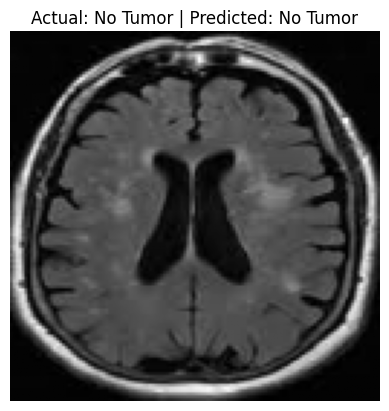

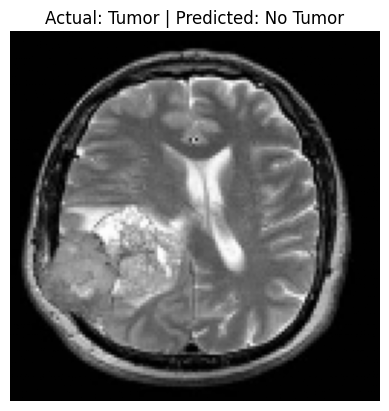

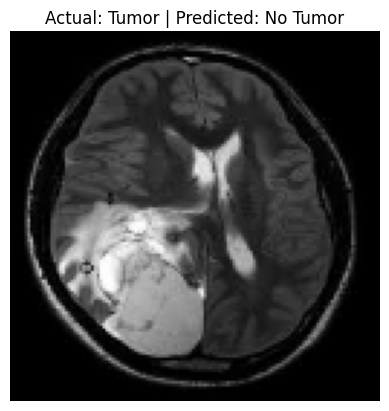

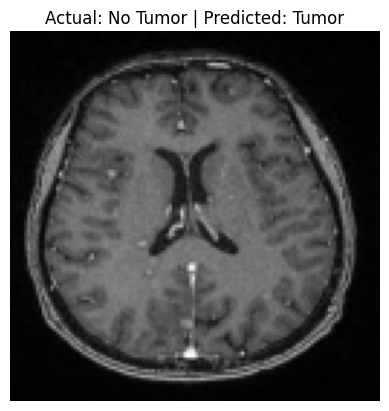

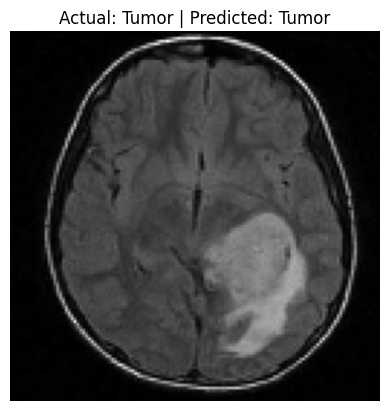

In [ ]:
!pip install -q kagglehub

import kagglehub
import os
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Download dataset
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")
print("Dataset downloaded at:", path)

# Step 2: Unzip dataset if needed
dataset_zip_path = os.path.join(path, "brain-mri-images-for-brain-tumor-detection.zip")
if os.path.exists(dataset_zip_path):
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(path)

# Step 3: Preprocess the data
IMG_SIZE = 128
data = []
labels = []
categories = ["yes", "no"]

# **Locate the correct dataset folder**
dataset_path = path  # Start with the downloaded path
for root, dirs, files in os.walk(path):
    if "yes" in dirs and "no" in dirs:
        dataset_path = root  # Update dataset_path if 'yes' and 'no' folders are found
        break

print("Dataset root path:", dataset_path)

# Iterate through categories and images
for category in categories:
    folder_path = os.path.join(dataset_path, category) # Use located dataset_path
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(1 if category == "yes" else 0)
        except Exception as e:
            pass

# Normalize and reshape
X = np.array(data) / 255.0
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(labels)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

# Step 7: Classification Report
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))

# Optional: Test visualization
def show_result(index):
    plt.imshow(X_test[index].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Actual: {'Tumor' if y_test[index]==1 else 'No Tumor'} | Predicted: {'Tumor' if y_pred_labels[index]==1 else 'No Tumor'}")
    plt.axis('off')
    plt.show()

# Show a few results
for i in range(5):
    show_result(i)

Dataset downloaded at: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1
Dataset root path: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 72, 72, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │       9,470,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,564,033 (36.48 MB)

 Trainable params: 9,563,585 (36.48 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.5481 - loss: 20.7588 - val_accuracy: 0.5294 - val_loss: 1.4631 - learning_rate: 5.0000e-04
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6215 - loss: 9.3630 - val_accuracy: 0.6471 - val_loss: 0.6551 - learning_rate: 5.0000e-04
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6126 - loss: 6.2303 - val_accuracy: 0.5294 - val_loss: 1.7446 - learning_rate: 5.0000e-04
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5660 - loss: 5.7851 - val_accuracy: 0.5294 - val_loss: 1.5888 - learning_rate: 5.0000e-04
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7192 - loss: 3.4889 - val_accuracy: 0.5294 - val_loss: 2.5483 - learning_rate: 2.5000e-04
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6492 - loss: 3.1039 - val_accuracy: 0.5294 - val_loss: 2.6941 - learning_rate: 2.5000e-04
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6647 - loss: 3.3904 - val

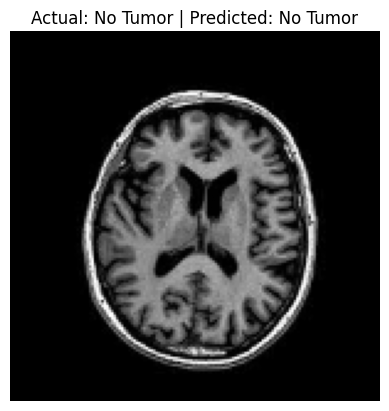

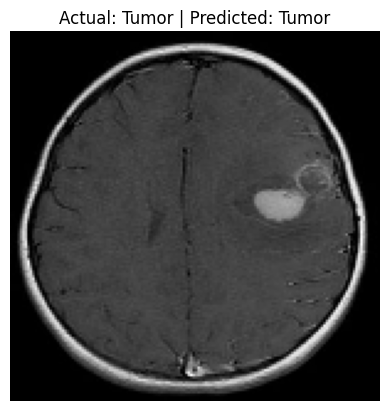

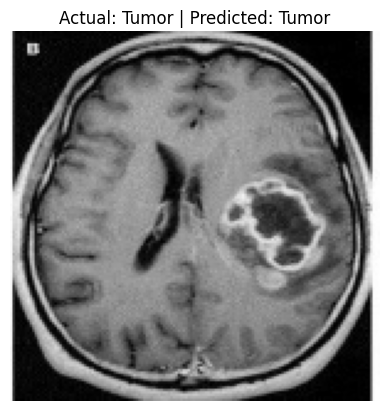

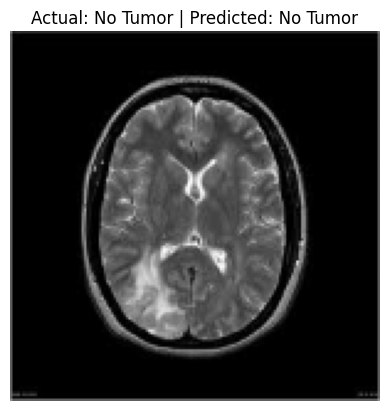

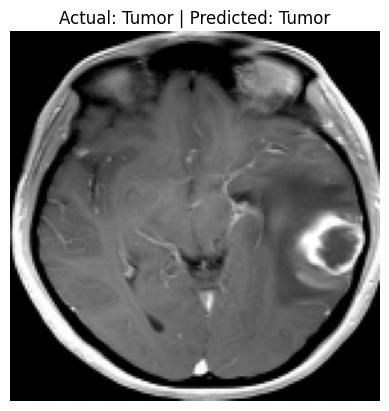

In [ ]:
!pip install -q kagglehub

import kagglehub
import os
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Download dataset
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")
print("Dataset downloaded at:", path)

# Step 2: Unzip if needed
dataset_zip_path = os.path.join(path, "brain-mri-images-for-brain-tumor-detection.zip")
if os.path.exists(dataset_zip_path):
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(path)

# Step 3: Preprocess
IMG_SIZE = 150
data, labels = [], []
categories = ["yes", "no"]

# Locate correct dataset folder
dataset_path = path
for root, dirs, files in os.walk(path):
    if "yes" in dirs and "no" in dirs:
        dataset_path = root
        break

print("Dataset root path:", dataset_path)

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(1 if category == "yes" else 0)
        except:
            continue

X = np.array(data).astype("float32") / 255.0
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(labels)

# Step 4: Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
)
datagen.fit(X_train)

# Step 6: Improved CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256),
    layers.LeakyReLU(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

opt = optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 7: Callbacks
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.5, patience=2, min_lr=1e-6)

# Step 8: Train
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_test, y_test), # Using test data for validation
    callbacks=[early_stop, reduce_lr]
)

# Step 9: Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Final Test Accuracy: {accuracy*100:.2f}%")

# Step 10: Classification Report
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Visualize
def show_result(index):
    plt.imshow(X_test[index].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Actual: {'Tumor' if y_test[index]==1 else 'No Tumor'} | Predicted: {'Tumor' if y_pred[index]==1 else 'No Tumor'}")
    plt.axis('off')
    plt.show()

for i in range(5):
    show_result(i)

Dataset downloaded at: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1
Dataset root path: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,516,609 (24.86 MB)

 Trainable params: 6,516,161 (24.86 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5531 - loss: 7.6080 - val_accuracy: 0.6000 - val_loss: 0.6182
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6084 - loss: 3.7524 - val_accuracy: 0.5500 - val_loss: 0.6394
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6418 - loss: 1.4828 - val_accuracy: 0.6500 - val_loss: 0.7557
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6757 - loss: 1.1957 - val_accuracy: 0.5500 - val_loss: 1.3365
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7373 - loss: 0.7762 - val_accuracy: 0.5500 - val_loss: 2.6709
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7860 - loss: 0.5990 - val_accuracy: 0.5500 - val_loss: 4.5007
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7177 - loss: 0.5856 - val_accuracy: 0.5500 - val_loss: 6.1537
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8435 - loss: 0.4676 - val_accuracy: 0.5500 - val_loss: 7.4476
Epoch 9/50

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


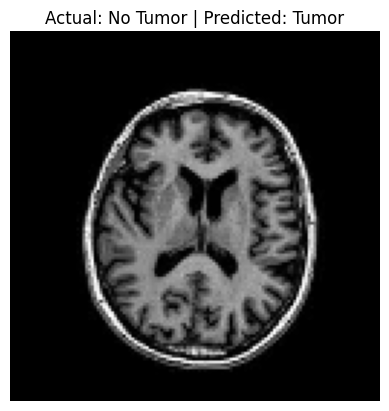

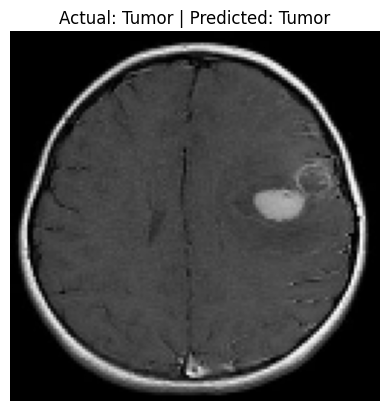

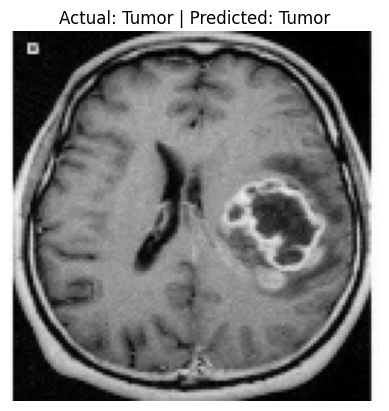

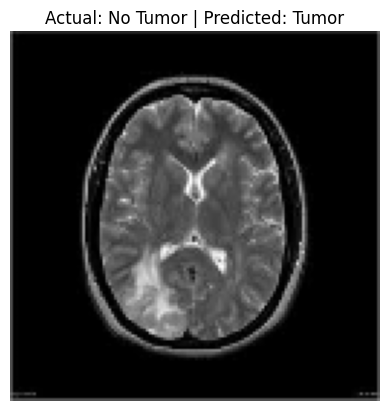

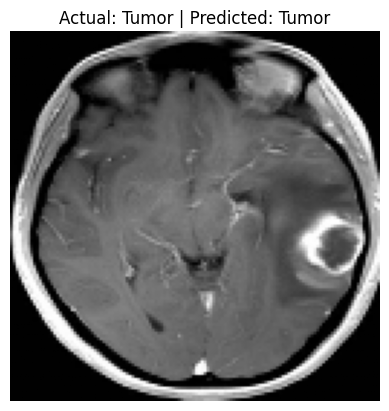

In [ ]:
!pip install -q kagglehub

import kagglehub
import os
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Download dataset
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")
print("Dataset downloaded at:", path)

# Step 2: Unzip dataset if needed
dataset_zip_path = os.path.join(path, "brain-mri-images-for-brain-tumor-detection.zip")
if os.path.exists(dataset_zip_path):
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(path)

# Step 3: Preprocess the data
IMG_SIZE = 128
data = []
labels = []
categories = ["yes", "no"]

# Find dataset root containing 'yes' and 'no'
dataset_path = path
for root, dirs, files in os.walk(path):
    if "yes" in dirs and "no" in dirs:
        dataset_path = root
        break

print("Dataset root path:", dataset_path)

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(1 if category == "yes" else 0)
        except:
            pass

# Normalize and reshape
X = np.array(data) / 255.0
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Step 5: Improved model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 6: Train with early stopping
early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Calculate validation data size based on split
validation_size = int(0.1 * len(X_train))

# Split training data into training and validation sets
X_train_subset, X_val, y_train_subset, y_val = train_test_split(
    X_train, y_train, test_size=validation_size, random_state=42
)

history = model.fit(
    datagen.flow(X_train_subset, y_train_subset, batch_size=32),  # Use training subset
    validation_data=(X_val, y_val),  # Pass validation data separately
    epochs=50,
)

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy*100:.2f}%")

# Step 8: Classification Report
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))

# Show 5 predictions
def show_result(index):
    plt.imshow(X_test[index].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Actual: {'Tumor' if y_test[index]==1 else 'No Tumor'} | Predicted: {'Tumor' if y_pred_labels[index]==1 else 'No Tumor'}")
    plt.axis('off')
    plt.show()

for i in range(5):
    show_result(i)